Załadowanie bibliotek

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_absolute_error, mean_squared_error

Wczytanie danych

In [13]:
dane_hbomax = pd.read_csv("HBO_MAX_Content.csv")
print(dane_hbomax.head())

   index                                              title type  year  \
0      0                                    Game of Thrones   TV  2011   
1      1                                     Rick and Morty   TV  2013   
2      2  The Lord of the Rings: The Fellowship of the Ring  NaN  2001   
3      3                                         Fight Club  NaN  1999   
4      4              The Lord of the Rings: The Two Towers  NaN  2002   

        rating  imdb_score  rotten_score     decade imdb_bucket  \
0      R/TV-MA         9.3          89.0  2010-2019   9.01-9.50   
1      R/TV-MA         9.2          94.0  2010-2019   9.01-9.50   
2  PG-13/TV-14         8.8          91.0  2000-2009   8.51-9.00   
3      R/TV-MA         8.8          79.0  1990-1999   8.51-9.00   
4  PG-13/TV-14         8.7          95.0  2000-2009   8.51-9.00   

   genres_Action_Adventure  ...  platforms_shudder  platforms_starz  \
0                        1  ...                  0                0   
1         

In [14]:
dane_hbo = pd.read_csv("HBO_Content.csv")
print(dane_hbo.head())

   index            title type  year   rating  imdb_score  rotten_score  \
0      0  Game of Thrones   TV  2011  R/TV-MA         9.3          89.0   
1      1       Fight Club  NaN  1999  R/TV-MA         8.8          79.0   
2      2            Alien  NaN  1979  R/TV-MA         8.4          94.0   
3      3        Chernobyl   TV  2019  R/TV-MA         9.4          96.0   
4      4         Die Hard  NaN  1988  R/TV-MA         8.2          93.0   

      decade imdb_bucket  genres_Action_Adventure  ...  platforms_hbo_max  \
0  2010-2019   9.01-9.50                        1  ...                  1   
1  1990-1999   8.51-9.00                        0  ...                  1   
2  1970-1979   8.01-8.50                        0  ...                  1   
3  2010-2019   9.01-9.50                        0  ...                  1   
4  1980-1989   8.01-8.50                        1  ...                  1   

   platforms_hoopla  platforms_hulu_plus  platforms_kanopy  platforms_netflix  \
0    

In [15]:
dane_hbomax.describe()

,index,year,imdb_score,rotten_score,genres_Action_Adventure,genres_Animation,genres_Anime,genres_Biography,genres_Children,genres_Comedy,...,platforms_shudder,platforms_starz,platforms_sundancenow,platforms_syfy_tveverywhere,platforms_tbs,platforms_tnt,platforms_trutv_tveverywhere,platforms_urbanmoviechannel,platforms_velocity_go,platforms_watch_tcm
count,2087.000000,2087.000000,2025.000000,1365.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,...,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000
mean,1043.000000,1997.639195,6.940593,72.652015,0.232870,0.090561,0.017250,0.065165,0.027791,0.334931,...,0.000479,0.002396,0.000479,0.000958,0.002875,0.002875,0.003833,0.000479,0.000479,0.008625
std,602.609326,22.898744,1.088414,26.435748,0.422761,0.287052,0.130231,0.246876,0.164413,0.472079,...,0.021890,0.048900,0.021890,0.030949,0.053554,0.053554,0.061809,0.021890,0.021890,0.092491
min,0.000000,1915.000000,1.700000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,521.500000,1989.000000,6.300000,56.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1043.000000,2006.000000,7.100000,83.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1564.500000,2015.000000,7.700000,94.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2086.000000,2020.000000,9.900000,100.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Uzupełnienie braków danych

In [16]:
dane_hbomax['type'] = dane_hbomax['type'].fillna('Movie')

In [17]:
dane_hbomax.head()

,index,title,type,year,rating,imdb_score,rotten_score,decade,imdb_bucket,genres_Action_Adventure,...,platforms_shudder,platforms_starz,platforms_sundancenow,platforms_syfy_tveverywhere,platforms_tbs,platforms_tnt,platforms_trutv_tveverywhere,platforms_urbanmoviechannel,platforms_velocity_go,platforms_watch_tcm
0,0,Game of Thrones,TV,2011,R/TV-MA,9.3,89.0,2010-2019,9.01-9.50,1,...,0,0,0,0,0,0,0,0,0,0
1,1,Rick and Morty,TV,2013,R/TV-MA,9.2,94.0,2010-2019,9.01-9.50,1,...,0,0,0,0,0,0,0,0,0,0
2,2,The Lord of the Rings: The Fellowship of the Ring,Movie,2001,PG-13/TV-14,8.8,91.0,2000-2009,8.51-9.00,1,...,0,0,0,0,0,0,0,0,0,0
3,3,Fight Club,Movie,1999,R/TV-MA,8.8,79.0,1990-1999,8.51-9.00,0,...,0,0,0,0,0,0,0,0,0,0
4,4,The Lord of the Rings: The Two Towers,Movie,2002,PG-13/TV-14,8.7,95.0,2000-2009,8.51-9.00,1,...,0,0,0,0,0,0,0,0,0,0


In [18]:
dane_hbo['type'] = dane_hbo['type'].fillna('Movie')

In [19]:
dane_hbo.head()

,index,title,type,year,rating,imdb_score,rotten_score,decade,imdb_bucket,genres_Action_Adventure,...,platforms_hbo_max,platforms_hoopla,platforms_hulu_plus,platforms_kanopy,platforms_netflix,platforms_shoutfactorytv,platforms_sundancenow,platforms_syfy_tveverywhere,platforms_tlc_go,platforms_viceland_tve
0,0,Game of Thrones,TV,2011,R/TV-MA,9.3,89.0,2010-2019,9.01-9.50,1,...,1,0,0,0,0,0,0,0,0,0
1,1,Fight Club,Movie,1999,R/TV-MA,8.8,79.0,1990-1999,8.51-9.00,0,...,1,0,0,0,0,0,0,0,0,0
2,2,Alien,Movie,1979,R/TV-MA,8.4,94.0,1970-1979,8.01-8.50,0,...,1,0,0,0,0,0,0,0,0,0
3,3,Chernobyl,TV,2019,R/TV-MA,9.4,96.0,2010-2019,9.01-9.50,0,...,1,0,0,0,0,0,0,0,0,0
4,4,Die Hard,Movie,1988,R/TV-MA,8.2,93.0,1980-1989,8.01-8.50,1,...,1,0,0,0,0,0,0,0,0,0


Wybór potrzebnych kolumn

In [20]:
dane_hbo_sel = dane_hbo[['title', 'type', 'year']]

In [21]:
dane_hbo_sel.head()

,title,type,year
0,Game of Thrones,TV,2011
1,Fight Club,Movie,1999
2,Alien,Movie,1979
3,Chernobyl,TV,2019
4,Die Hard,Movie,1988


In [22]:
dane_hbomax_sel = dane_hbomax[['title', 'type', 'year']]

In [23]:
dane_hbomax_sel.head()

,title,type,year
0,Game of Thrones,TV,2011
1,Rick and Morty,TV,2013
2,The Lord of the Rings: The Fellowship of the Ring,Movie,2001
3,Fight Club,Movie,1999
4,The Lord of the Rings: The Two Towers,Movie,2002


In [24]:
dane_hbomax_sel.describe()

,year
count,2087.000000
mean,1997.639195
std,22.898744
min,1915.000000
25%,1989.000000
50%,2006.000000
75%,2015.000000
max,2020.000000


In [25]:
dane_hbo_sel.describe()

,year
count,1386.000000
mean,2008.082251
std,10.705329
min,1960.000000
25%,2002.000000
50%,2011.000000
75%,2017.000000
max,2020.000000


Połączenie dwóch datasetów

In [26]:
df_hbo = pd.concat([dane_hbo_sel, dane_hbomax_sel], ignore_index=True)

In [27]:
df_hbo.head()

,title,type,year
0,Game of Thrones,TV,2011
1,Fight Club,Movie,1999
2,Alien,Movie,1979
3,Chernobyl,TV,2019
4,Die Hard,Movie,1988


In [28]:
df_hbo.describe()

,year
count,3473.000000
mean,2001.806795
std,19.670071
min,1915.000000
25%,1996.000000
50%,2008.000000
75%,2016.000000
max,2020.000000


Wyczyszczenie danych

In [29]:
df_hbo_clean = df_hbo.drop_duplicates(subset=['title'], keep='first')

In [30]:
df_hbo_clean.describe()

,year
count,2175.000000
mean,1998.862069
std,22.025500
min,1915.000000
25%,1991.000000
50%,2006.000000
75%,2015.000000
max,2020.000000


Utworzenie szeregu czasowego

In [31]:
# Grupowanie po roku i typie
ready_df = df_hbo_clean.groupby(['year', 'type']).size().unstack(fill_value=0)

# Sortowanie po roku
ready_df = ready_df.sort_index()

# Wyświetlenie tabeli
print("Szereg czasowy - liczba filmów i seriali w kolejnych latach:")
print(ready_df)


Szereg czasowy - liczba filmów i seriali w kolejnych latach:
type  Movie  TV
year           
1915      1   0
1916      1   0
1917      1   0
1918      2   0
1919      2   0
...     ...  ..
2016     69  43
2017     55  20
2018    122  36
2019    122  32
2020     19  23

[103 rows x 2 columns]


In [32]:
ready_df.head()

type,Movie,TV
year,,
1915,1,0
1916,1,0
1917,1,0
1918,2,0
1919,2,0


In [33]:
ready_df.index = pd.to_datetime(ready_df.index, format='%Y')

Wizualizacja danych

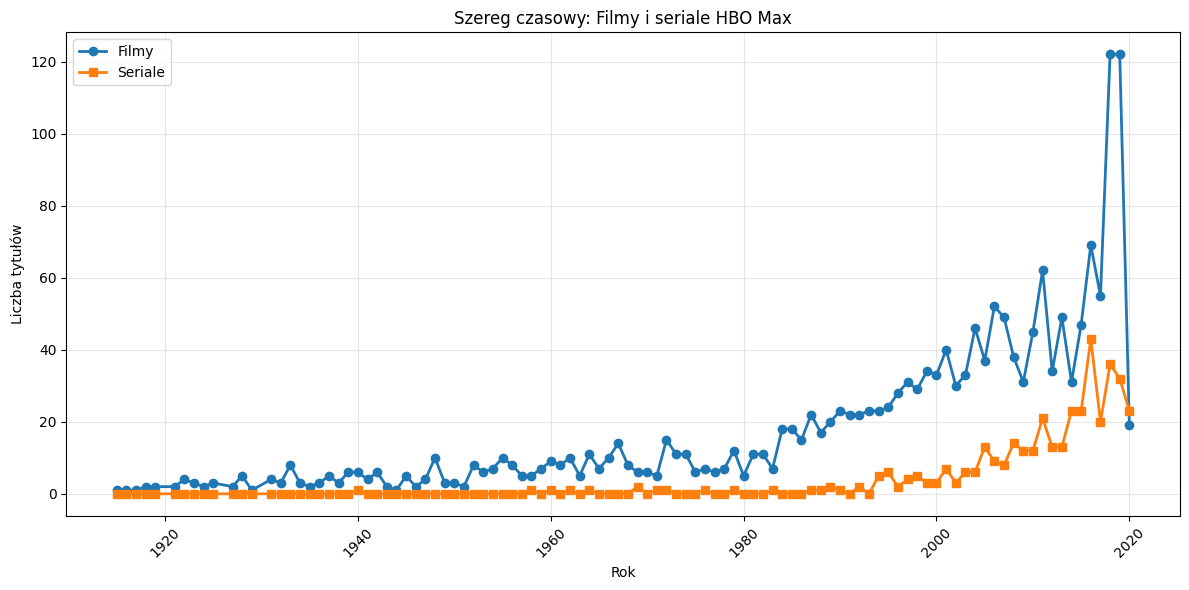

In [34]:
plt.figure(figsize=(12, 6))
plt.plot(ready_df.index, ready_df['Movie'], marker='o', label='Filmy', linewidth=2)
plt.plot(ready_df.index, ready_df['TV'], marker='s', label='Seriale', linewidth=2)
plt.xlabel('Rok')
plt.ylabel('Liczba tytułów')
plt.title('Szereg czasowy: Filmy i seriale HBO Max')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Test Dickeya-Fullera (ADF) - czy szereg jest stacjonarny

In [35]:
def adf_test(series, name=''):
    """Przeprowadza test ADF i wyświetla wyniki"""
    result = adfuller(series.dropna())
    print(f'Test ADF dla: {name}')
    print(f'Statystyka ADF: {result[0]:.4f}')
    print(f'p-value: {result[1]:.4f}')
    print(f'Wartości krytyczne:')
    for key, value in result[4].items():
        print(f'  {key}: {value:.4f}')

    if result[1] < 0.05:
        print("=> Szereg jest STACJONARNY (odrzucamy H0)\n")
    else:
        print("=> Szereg jest NIESTACJONARNY (nie odrzucamy H0)\n")
    return result[1]

# Test na oryginalnych danych
adf_test(ready_df['Movie'], 'Liczba wydanych filmow')

Test ADF dla: Liczba wydanych filmow
Statystyka ADF: 3.5758
p-value: 1.0000
Wartości krytyczne:
  1%: -3.5052
  5%: -2.8942
  10%: -2.5842
=> Szereg jest NIESTACJONARNY (nie odrzucamy H0)



1.0

In [36]:
adf_test(ready_df['TV'], 'Liczba wydanych seriali')

Test ADF dla: Liczba wydanych seriali
Statystyka ADF: 4.3833
p-value: 1.0000
Wartości krytyczne:
  1%: -3.5043
  5%: -2.8939
  10%: -2.5840
=> Szereg jest NIESTACJONARNY (nie odrzucamy H0)



1.0

Dane nie są stacjonarne, zatem przekształcanie danych

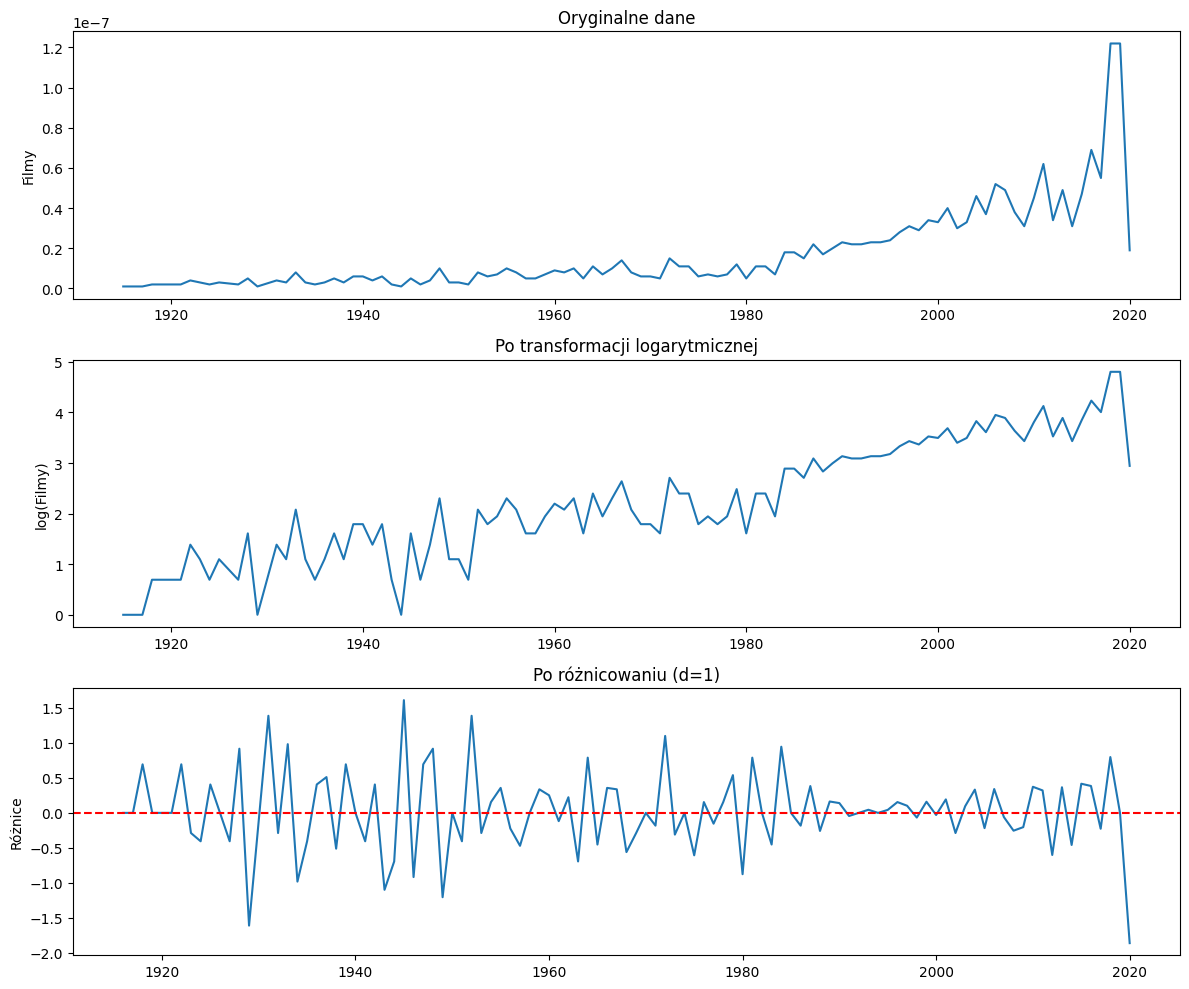

Test ADF dla: Po log + różnicowaniu (d=1)
Statystyka ADF: -7.0480
p-value: 0.0000
Wartości krytyczne:
  1%: -3.5011
  5%: -2.8925
  10%: -2.5833
=> Szereg jest STACJONARNY (odrzucamy H0)



np.float64(5.620264289596118e-10)

In [37]:
# Przekształcanie danych z filmów
# Transformacja logarytmiczna
ready_df['Log_Movie'] = np.log(ready_df['Movie'])

# Różnicowanie pierwszego rzędu
ready_df['Log_Diff'] = ready_df['Log_Movie'].diff()

# Wizualizacja transformacji
fig, axes = plt.subplots(3, 1, figsize=(12, 10))

axes[0].plot(ready_df['Movie']/1e9)
axes[0].set_title('Oryginalne dane')
axes[0].set_ylabel('Filmy')

axes[1].plot(ready_df['Log_Movie'])
axes[1].set_title('Po transformacji logarytmicznej')
axes[1].set_ylabel('log(Filmy)')

axes[2].plot(ready_df['Log_Diff'])
axes[2].set_title('Po różnicowaniu (d=1)')
axes[2].set_ylabel('Różnice')
axes[2].axhline(y=0, color='r', linestyle='--')

plt.tight_layout()
plt.show()

# Testy stacjonarności
print("="*50)
adf_test(ready_df['Log_Diff'].dropna(), 'Po log + różnicowaniu (d=1)')

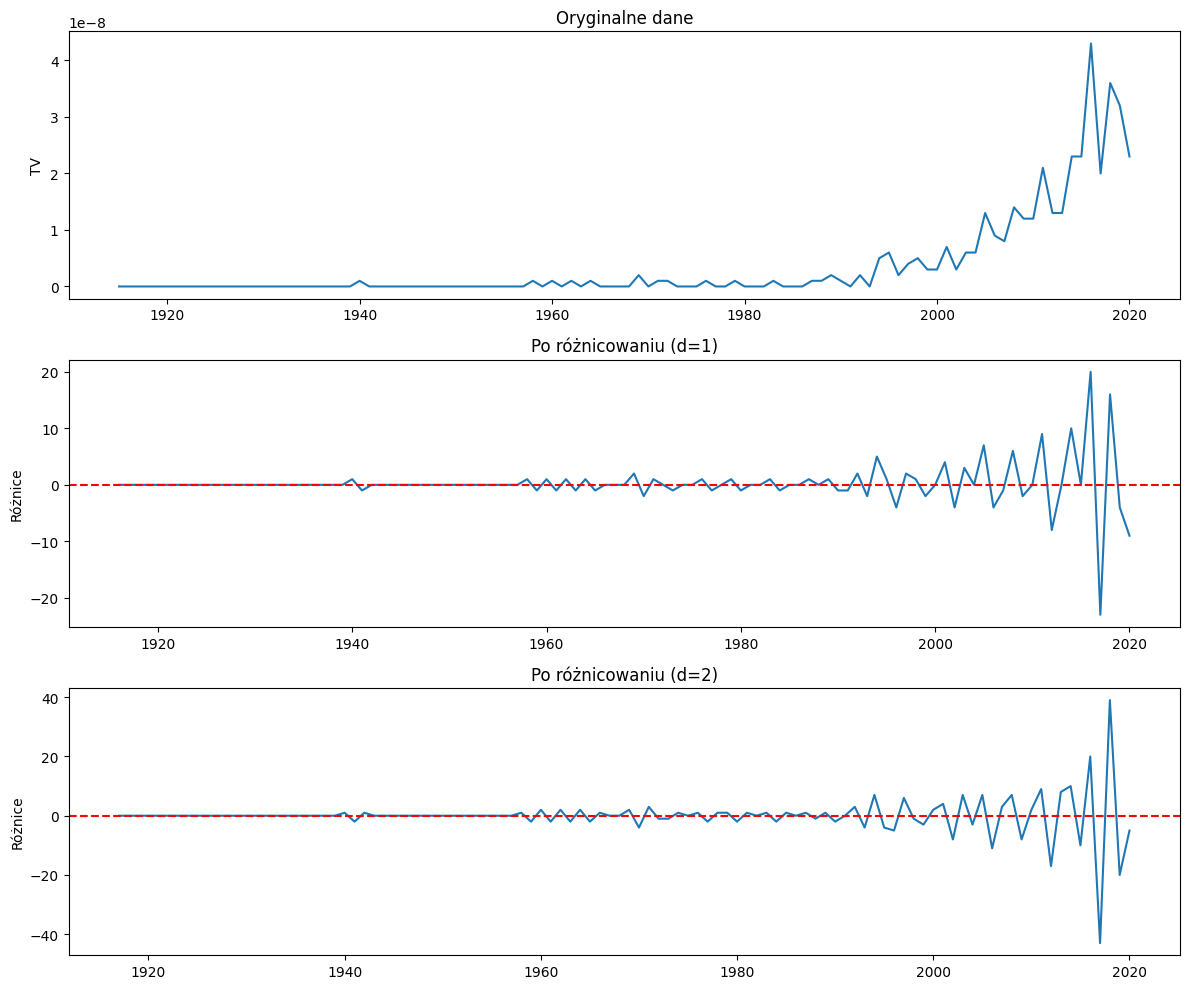

Test ADF dla: Po różnicowaniu (d=1)
Statystyka ADF: 4.4493
p-value: 1.0000
Wartości krytyczne:
  1%: -3.5061
  5%: -2.8946
  10%: -2.5844
=> Szereg jest NIESTACJONARNY (nie odrzucamy H0)

Test ADF dla: Po różnicowaniu (d=2)
Statystyka ADF: -7.8976
p-value: 0.0000
Wartości krytyczne:
  1%: -3.5043
  5%: -2.8939
  10%: -2.5840
=> Szereg jest STACJONARNY (odrzucamy H0)



np.float64(4.269323309981163e-12)

In [38]:
# Przekształcanie danych z seriali
# Różnicowanie pierwszego rzędu
ready_df['Diff_TV'] = ready_df['TV'].diff()

# Różnicowanie pierwszego rzędu
ready_df['Diff_TV_2'] = ready_df['Diff_TV'].diff()

# Wizualizacja transformacji
fig, axes = plt.subplots(3, 1, figsize=(12, 10))

axes[0].plot(ready_df['TV']/1e9)
axes[0].set_title('Oryginalne dane')
axes[0].set_ylabel('TV')

axes[1].plot(ready_df['Diff_TV'])
axes[1].set_title('Po różnicowaniu (d=1)')
axes[1].set_ylabel('Różnice')
axes[1].axhline(y=0, color='r', linestyle='--')

axes[2].plot(ready_df['Diff_TV_2'])
axes[2].set_title('Po różnicowaniu (d=2)')
axes[2].set_ylabel('Różnice')
axes[2].axhline(y=0, color='r', linestyle='--')

plt.tight_layout()
plt.show()

# Testy stacjonarności
print("="*50)
adf_test(ready_df['Diff_TV'].dropna(), 'Po różnicowaniu (d=1)')
adf_test(ready_df['Diff_TV_2'].dropna(), 'Po różnicowaniu (d=2)')

Określenie parametrów p i q (ACF i PACF)

Model AR(p) przewiduje wartość na podstawie poprzednich wartości szeregu

Model MA(q) przewiduje wartość na podstawie poprzednich błędów prognozy

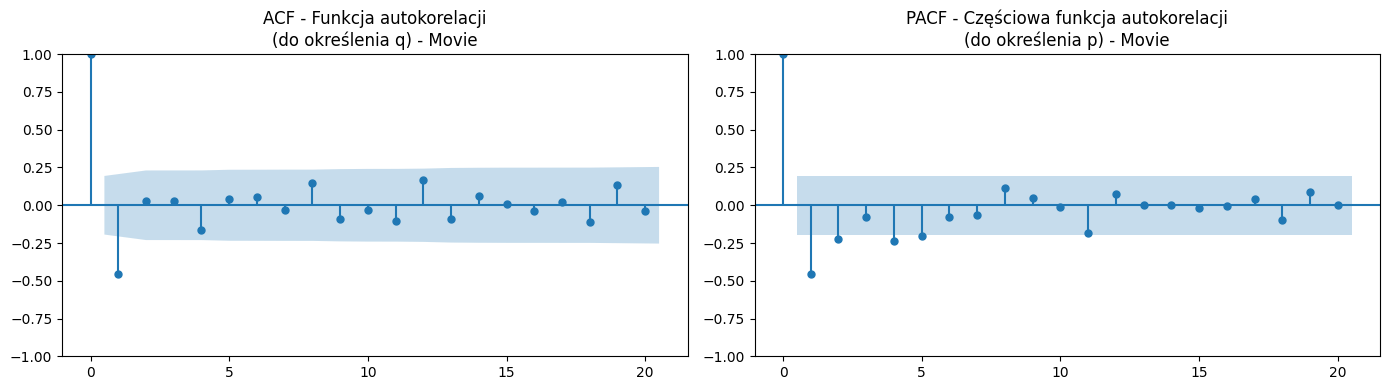

In [39]:
fig, axes = plt.subplots(1, 2, figsize=(14, 4))

# ACF
plot_acf(ready_df['Log_Diff'].dropna(), lags=20, ax=axes[0])
axes[0].set_title('ACF - Funkcja autokorelacji\n(do określenia q) - Movie')

# PACF
plot_pacf(ready_df['Log_Diff'].dropna(), lags=20, ax=axes[1])
axes[1].set_title('PACF - Częściowa funkcja autokorelacji\n(do określenia p) - Movie')

plt.tight_layout()
plt.show()

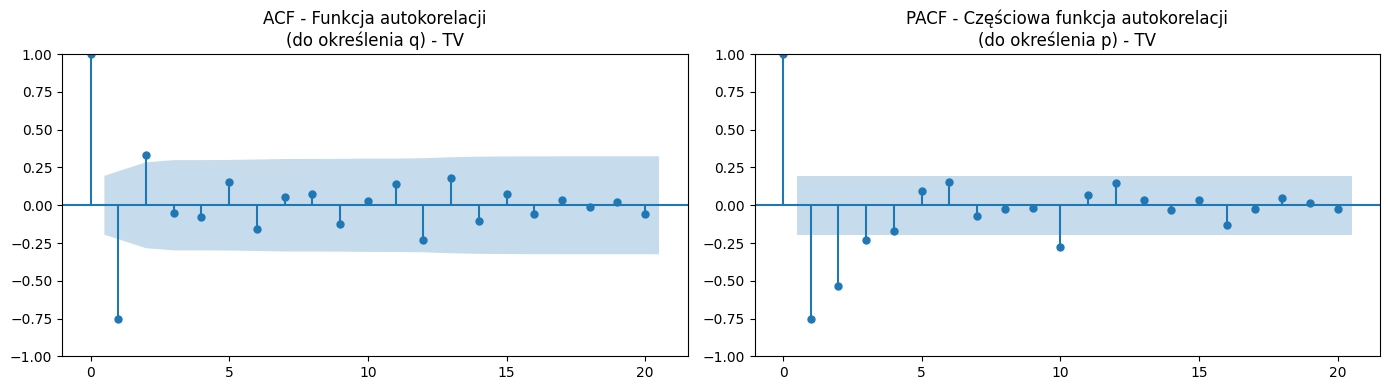

In [40]:
fig, axes = plt.subplots(1, 2, figsize=(14, 4))

# ACF
plot_acf(ready_df['Diff_TV_2'].dropna(), lags=20, ax=axes[0])
axes[0].set_title('ACF - Funkcja autokorelacji\n(do określenia q) - TV')

# PACF
plot_pacf(ready_df['Diff_TV_2'].dropna(), lags=20, ax=axes[1])
axes[1].set_title('PACF - Częściowa funkcja autokorelacji\n(do określenia p) - TV')

plt.tight_layout()
plt.show()


Pełny Model ARIMA(p, d, q)

Popularne konfiguracje:

ARIMA(0, 1, 0) - błądzenie losowe (random walk)

ARIMA(1, 0, 0) - prosty model AR(1)

ARIMA(0, 0, 1) - prosty model MA(1)

ARIMA(1, 1, 1) - podstawowy model z różnicowaniem

ARIMA(2, 1, 2) - bardziej złożony model

Wybór parametrów:
 - Analiza ACF i PACF
 - Kryteria informacyjne (AIC, BIC)
 - Walidacja krzyżowa

In [41]:
# Testowanie różnych kombinacji dla filmów
results = []
orders = [(1, 1, 1), (1, 2, 1), (2, 1, 2), (2, 2, 1), (2, 2, 2), (1, 2, 2)]

for order in orders:
    try:
        model = ARIMA(ready_df['Log_Diff'], order=order)
        fit = model.fit()
        results.append({
            'Order': f'ARIMA{order}',
            'AIC': fit.aic,
            'BIC': fit.bic
        })
    except:
        pass

results_df = pd.DataFrame(results).sort_values('AIC')
print("Porównanie modeli (sortowane po AIC):\n")
print(results_df.to_string(index=False))
print(f"\nNajlepszy model dla filmów: {results_df.iloc[0]['Order']}")

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Porównanie modeli (sortowane po AIC):

         Order        AIC        BIC
ARIMA(2, 1, 2) 161.806380 174.931244
ARIMA(1, 1, 1) 177.606744 185.481662
ARIMA(2, 2, 2) 183.457645 196.533248
ARIMA(1, 2, 2) 187.717289 198.177771
ARIMA(2, 2, 1) 219.806448 230.266930
ARIMA(1, 2, 1) 246.293424 254.138786

Najlepszy model dla filmów: ARIMA(2, 1, 2)


In [42]:
# Testowanie różnych kombinacji dla seriali
results = []
orders = [(1, 1, 1), (1, 2, 1), (2, 1, 2), (2, 2, 1), (2, 2, 2), (1, 2, 2)]

for order in orders:
    try:
        model = ARIMA(ready_df['Diff_TV_2'], order=order)
        fit = model.fit()
        results.append({
            'Order': f'ARIMA{order}',
            'AIC': fit.aic,
            'BIC': fit.bic
        })
    except:
        pass

results_df = pd.DataFrame(results).sort_values('AIC')
print("Porównanie modeli (sortowane po AIC):\n")
print(results_df.to_string(index=False))
print(f"\nNajlepszy model dla seriali: {results_df.iloc[0]['Order']}")

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/pyth

Porównanie modeli (sortowane po AIC):

         Order        AIC        BIC
ARIMA(2, 1, 2) 547.520978 560.645842
ARIMA(2, 2, 2) 600.862192 613.937795
ARIMA(1, 1, 1) 629.336568 637.211487
ARIMA(1, 2, 2) 651.770522 662.231004
ARIMA(2, 2, 1) 660.980938 671.441420
ARIMA(1, 2, 1) 737.396387 745.241748

Najlepszy model dla seriali: ARIMA(2, 1, 2)


Budowanie modelu ARIMA

In [50]:
# Podział na zbiór treningowy i testowy
train_size = int(len(ready_df) * 0.8)
train_movies = ready_df['Movie'][:train_size]
test_movies = ready_df['Movie'][train_size:]
train_tv = ready_df['TV'][:train_size]
test_tv = ready_df['TV'][train_size:]

# Budowa modelu ARIMA(2, 1, 2) dla filmów
model_M = ARIMA(train_movies, order=(2, 1, 2))
wynik_movies = model_M.fit()

# Budowa modelu ARIMA(2,2,2) dla seriali, bo podwójne różnicowanie
model_TV = ARIMA(train_tv, order=(2,2,2))
wynik_tv = model_TV.fit()

# Podsumowanie modelu
print("Wyniki dla filmów: ", wynik_movies.summary())
print("Wyniki dla seriali: ", wynik_tv.summary())

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Wyniki dla filmów:                                 SARIMAX Results                                
Dep. Variable:                  Movie   No. Observations:                   82
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -205.288
Date:                Thu, 29 Jan 2026   AIC                            420.576
Time:                        09:04:58   BIC                            432.548
Sample:                             0   HQIC                           425.379
                                 - 82                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.0217      0.306     -3.337      0.001      -1.622      -0.422
ar.L2         -0.5502      0.146     -3.758      0.000      -0.837      -0.263
ma.L1          0.5290      0.376

Prognoza liczby wydanych filmów i seriali w kolejnych latach

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


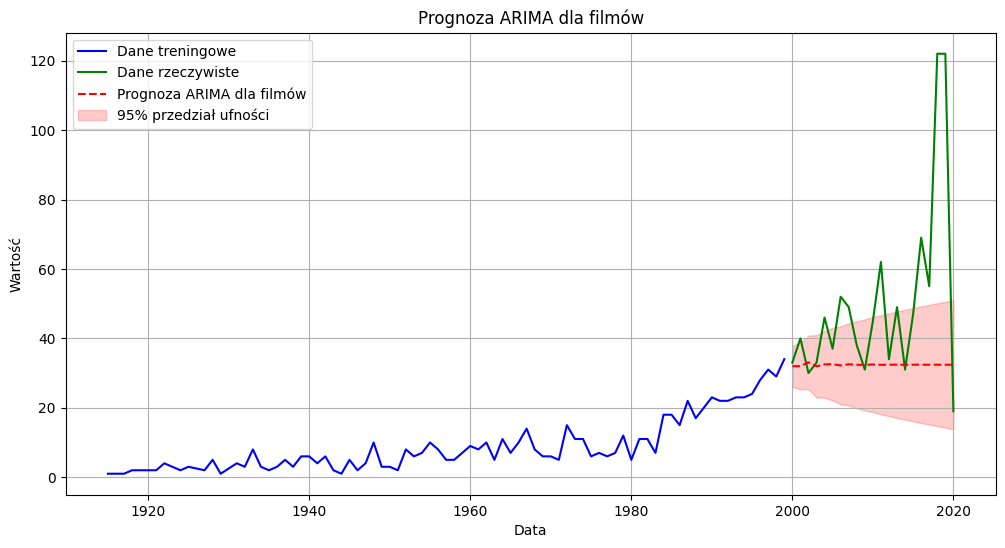

In [44]:
# Prognoza dla filmów
forecast_steps = len(test_movies)

prognoza1 = wynik_movies.forecast(steps=forecast_steps)

# Prognoza z przedziałami ufności
prognoza_obj = wynik_movies.get_forecast(steps=forecast_steps)
prognoza1 = prognoza_obj.predicted_mean
przedzial = prognoza_obj.conf_int()

# Wizualizacja
plt.figure(figsize=(12, 6))

# Dane historyczne
plt.plot(train_movies.index, train_movies, label='Dane treningowe', color='blue')
plt.plot(test_movies.index, test_movies, label='Dane rzeczywiste', color='green')

# Prognoza
plt.plot(test_movies.index, prognoza1, label='Prognoza ARIMA dla filmów',
         color='red', linestyle='--')

# Przedział ufności
plt.fill_between(test_movies.index,
                 przedzial.iloc[:, 0],
                 przedzial.iloc[:, 1],
                 color='red', alpha=0.2,
                 label='95% przedział ufności')

plt.title('Prognoza ARIMA dla filmów')
plt.xlabel('Data')
plt.ylabel('Wartość')
plt.legend()
plt.grid(True)
plt.show()

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


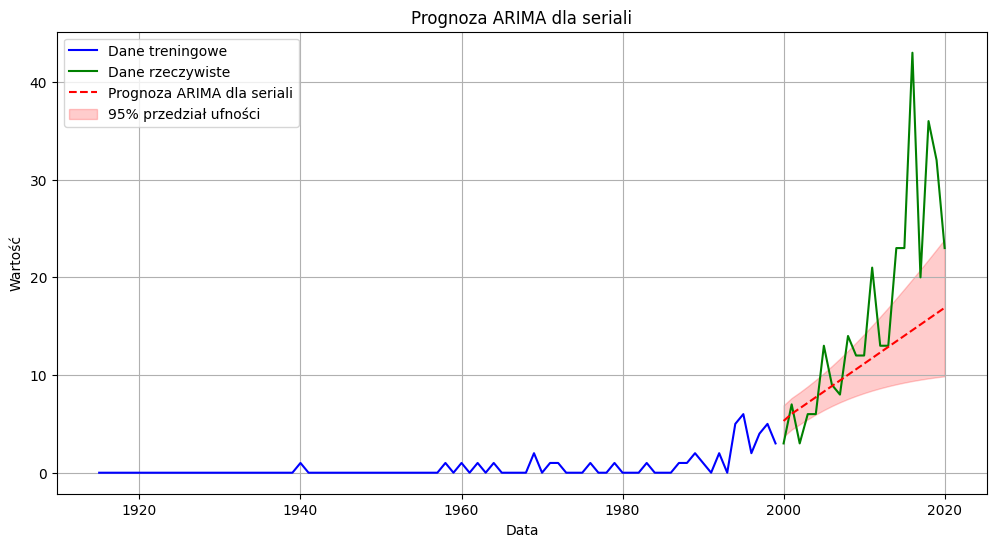

In [45]:
# Prognoza dla serialów
forecast_steps = len(test_tv)
prognoza2 = wynik_tv.forecast(steps=forecast_steps)

# Prognoza z przedziałami ufności
prognoza_obj = wynik_tv.get_forecast(steps=forecast_steps)
prognoza2 = prognoza_obj.predicted_mean
przedzial = prognoza_obj.conf_int()

# Wizualizacja
plt.figure(figsize=(12, 6))

# Dane historyczne
plt.plot(train_tv.index, train_tv, label='Dane treningowe', color='blue')
plt.plot(test_tv.index, test_tv, label='Dane rzeczywiste', color='green')

# Prognoza
plt.plot(test_tv.index, prognoza2, label='Prognoza ARIMA dla seriali',
         color='red', linestyle='--')

# Przedział ufności
plt.fill_between(test_tv.index,
                 przedzial.iloc[:, 0],
                 przedzial.iloc[:, 1],
                 color='red', alpha=0.2,
                 label='95% przedział ufności')

plt.title('Prognoza ARIMA dla seriali')
plt.xlabel('Data')
plt.ylabel('Wartość')
plt.legend()
plt.grid(True)
plt.show()

Płaski przebieg prognozy wynika z faktu, że model ARIMA w prognozie długookresowej dąży do średniej procesu, co jest typowym ograniczeniem tego  modelu.

Analiza reszt

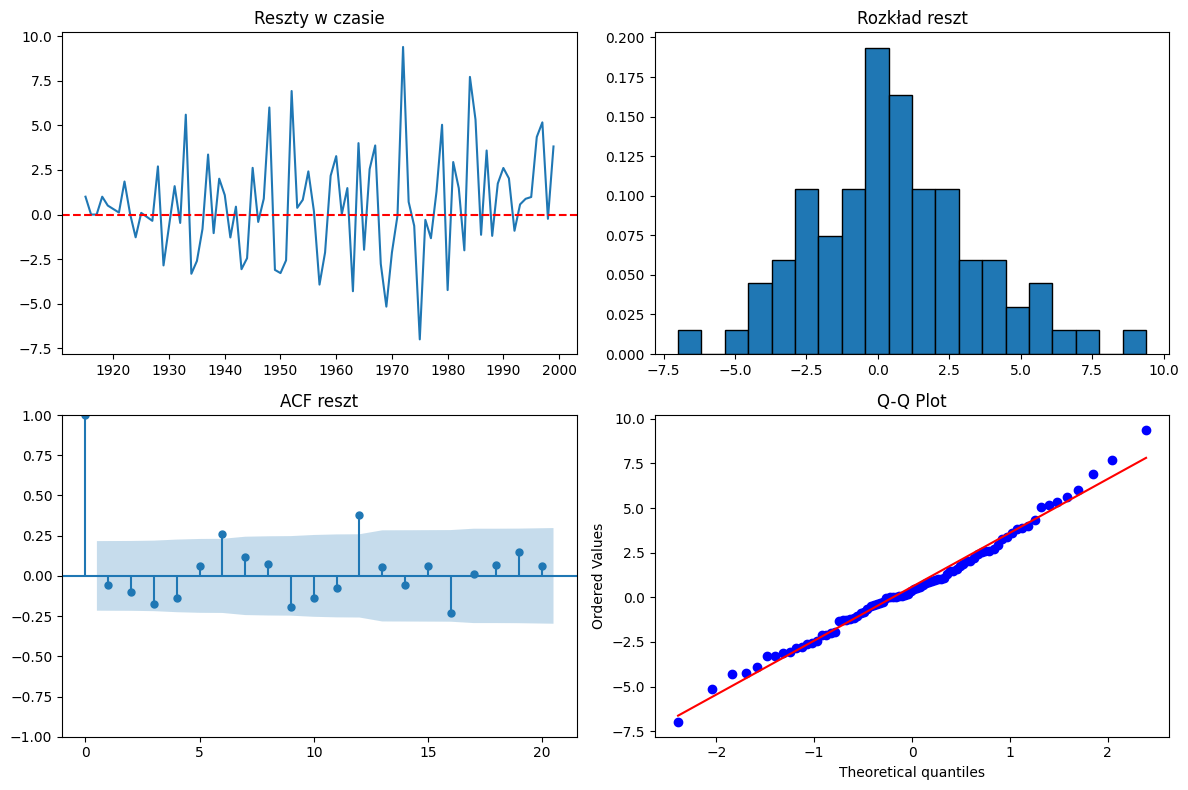

Średnia reszt: 0.589252
Odchylenie std: 2.986948


In [46]:
residuals = wynik_movies.resid

fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Wykres reszt
axes[0, 0].plot(residuals)
axes[0, 0].set_title('Reszty w czasie')
axes[0, 0].axhline(y=0, color='r', linestyle='--')

# Histogram
axes[0, 1].hist(residuals, bins=20, edgecolor='black', density=True)
axes[0, 1].set_title('Rozkład reszt')

# ACF reszt
plot_acf(residuals, lags=20, ax=axes[1, 0])
axes[1, 0].set_title('ACF reszt')

# Q-Q plot
from scipy import stats
stats.probplot(residuals, dist="norm", plot=axes[1, 1])
axes[1, 1].set_title('Q-Q Plot')

plt.tight_layout()
plt.show()

print(f"Średnia reszt: {residuals.mean():.6f}")
print(f"Odchylenie std: {residuals.std():.6f}")

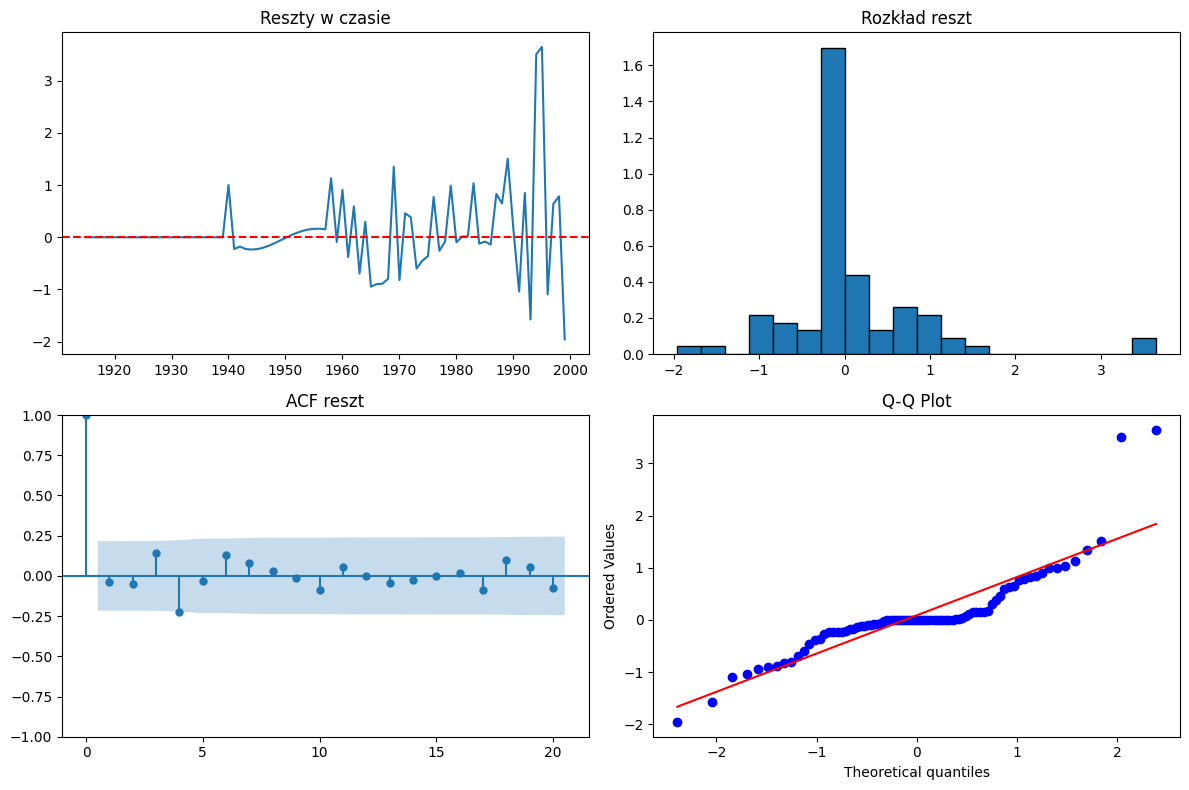

Średnia reszt: 0.089427
Odchylenie std: 0.806561


In [47]:
residuals = wynik_tv.resid

fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Wykres reszt
axes[0, 0].plot(residuals)
axes[0, 0].set_title('Reszty w czasie')
axes[0, 0].axhline(y=0, color='r', linestyle='--')

# Histogram
axes[0, 1].hist(residuals, bins=20, edgecolor='black', density=True)
axes[0, 1].set_title('Rozkład reszt')

# ACF reszt
plot_acf(residuals, lags=20, ax=axes[1, 0])
axes[1, 0].set_title('ACF reszt')

# Q-Q plot
from scipy import stats
stats.probplot(residuals, dist="norm", plot=axes[1, 1])
axes[1, 1].set_title('Q-Q Plot')

plt.tight_layout()
plt.show()

print(f"Średnia reszt: {residuals.mean():.6f}")
print(f"Odchylenie std: {residuals.std():.6f}")

Metryki oceny modelu

In [48]:
def metryki_prognozy(rzeczywiste, prognoza):
    """Oblicza popularne metryki błędów prognozy."""

    # MAE - Mean Absolute Error (średni błąd bezwzględny)
    mae = mean_absolute_error(rzeczywiste, prognoza)

    # MSE - Mean Squared Error (średni błąd kwadratowy)
    mse = mean_squared_error(rzeczywiste, prognoza)

    # RMSE - Root Mean Squared Error
    rmse = np.sqrt(mse)

    # MAPE - Mean Absolute Percentage Error
    mape = np.mean(np.abs((rzeczywiste - prognoza) / rzeczywiste)) * 100

    print("=== METRYKI PROGNOZY ===")
    print(f"MAE:  {mae:.2f}")
    print(f"MSE:  {mse:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"MAPE: {mape:.2f}%")

    return {'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'MAPE': mape}

# Użycie
metryki = metryki_prognozy(test_movies.values, prognoza1.values)
print("Dla filmów")
# Interpretacja MAPE:
# <= 10% - Doskonała prognoza
# 10-20% - Dobra prognoza
# 20-50% - Akceptowalna prognoza
# >= 50% - Słaba prognoza

=== METRYKI PROGNOZY ===
MAE:  19.17
MSE:  980.28
RMSE: 31.31
MAPE: 30.00%
Dla filmów


In [49]:
metryki = metryki_prognozy(test_tv.values, prognoza2.values)
print("Dla seriali")

=== METRYKI PROGNOZY ===
MAE:  6.01
MSE:  87.99
RMSE: 9.38
MAPE: 33.99%
Dla seriali
